# House Prices

##  Przeanalizowanie zadania
Moim zadaniem jest stworzenie modelu który bedzie przewidywał ceny kazdego domu na podstawie dostarczonego zbioru danych który zawiera róznorodne cechy związane z domami.

Zmienna docelowa ceny domów jest to wartość ciągła wiec zadanie jest problemem regresji

Metryka oceny bedzie pierwiastek błedu średniokwadratowego ( RMSE ) który jest średnią kwadratową róznic miedzy wartościami obserowanymi a wartościami przewidywanymi. Dowiadujemy sie dzeki niemu, w jakim stopniu model myli sie w przewidywaniach, wraz ze wzrostem wartości błedu rośnie waga tego wskaźnika



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analiza danych

#### Wczytywanie danych

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1211,1212,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,164000
409,410,60,FV,85.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,339750
1103,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,159500
432,433,160,RM,24.0,1920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,122500
69,70,50,RL,81.0,15593,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,225000
535,536,190,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,107500
477,478,60,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,380000
670,671,60,RL,64.0,8633,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,173500
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
124,125,20,RL,48.0,17043,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,181000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
# pd.set_option('display.max_rows',None) #Pokazuje wszystkie wiersze bez zadnego limitu
#wybiera tylko te kolumny z test.isnull().sum() które maja wartość True w masce utworzonej na podstawie train.isnull().sum() >=1
missing_values = train.isnull().sum()[train.isnull().sum()>= 1].sort_values(ascending= False)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
test.isnull().sum()[train.isnull().sum() >=1]

LotFrontage      227
Alley           1352
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Electrical         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [11]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
Name: count, dtype: int64

In [12]:
list_object = test.dtypes[test.dtypes== 'object'].index.tolist()
list_object

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Wnioski

- W zbiorze treningowym znajduje sie 1460 wierszy i 81 cech
- W zbiorze testowym znajduje sie (145 i, 8 cech (zostala usunieta wartosc docelowa)
- Typy danych ktore znajduja sie zbiorze treningowym:
    1. object 43 -  to zmienne kategorialne
    2. int6  3 - zmienna liczby całowitej
    3.
float3   - zmienna liczby zmienno przecinkowej
- W 19 cecha w zbiorze treningowym brakuje wartosci
- Liczne brakujące wartości w kolumnach takich jak Alley, FireplaceQu, PoolQC
 - Typy danych ktore znajduja sie zbiorze testowym:
    1. object: 43 to zmienne kategorialne
    2. int64: 26 zmienna liczby całowitej
    3. float64: 11 zmienna liczby zmienno przecinkowe)

## Wizualizacja danych

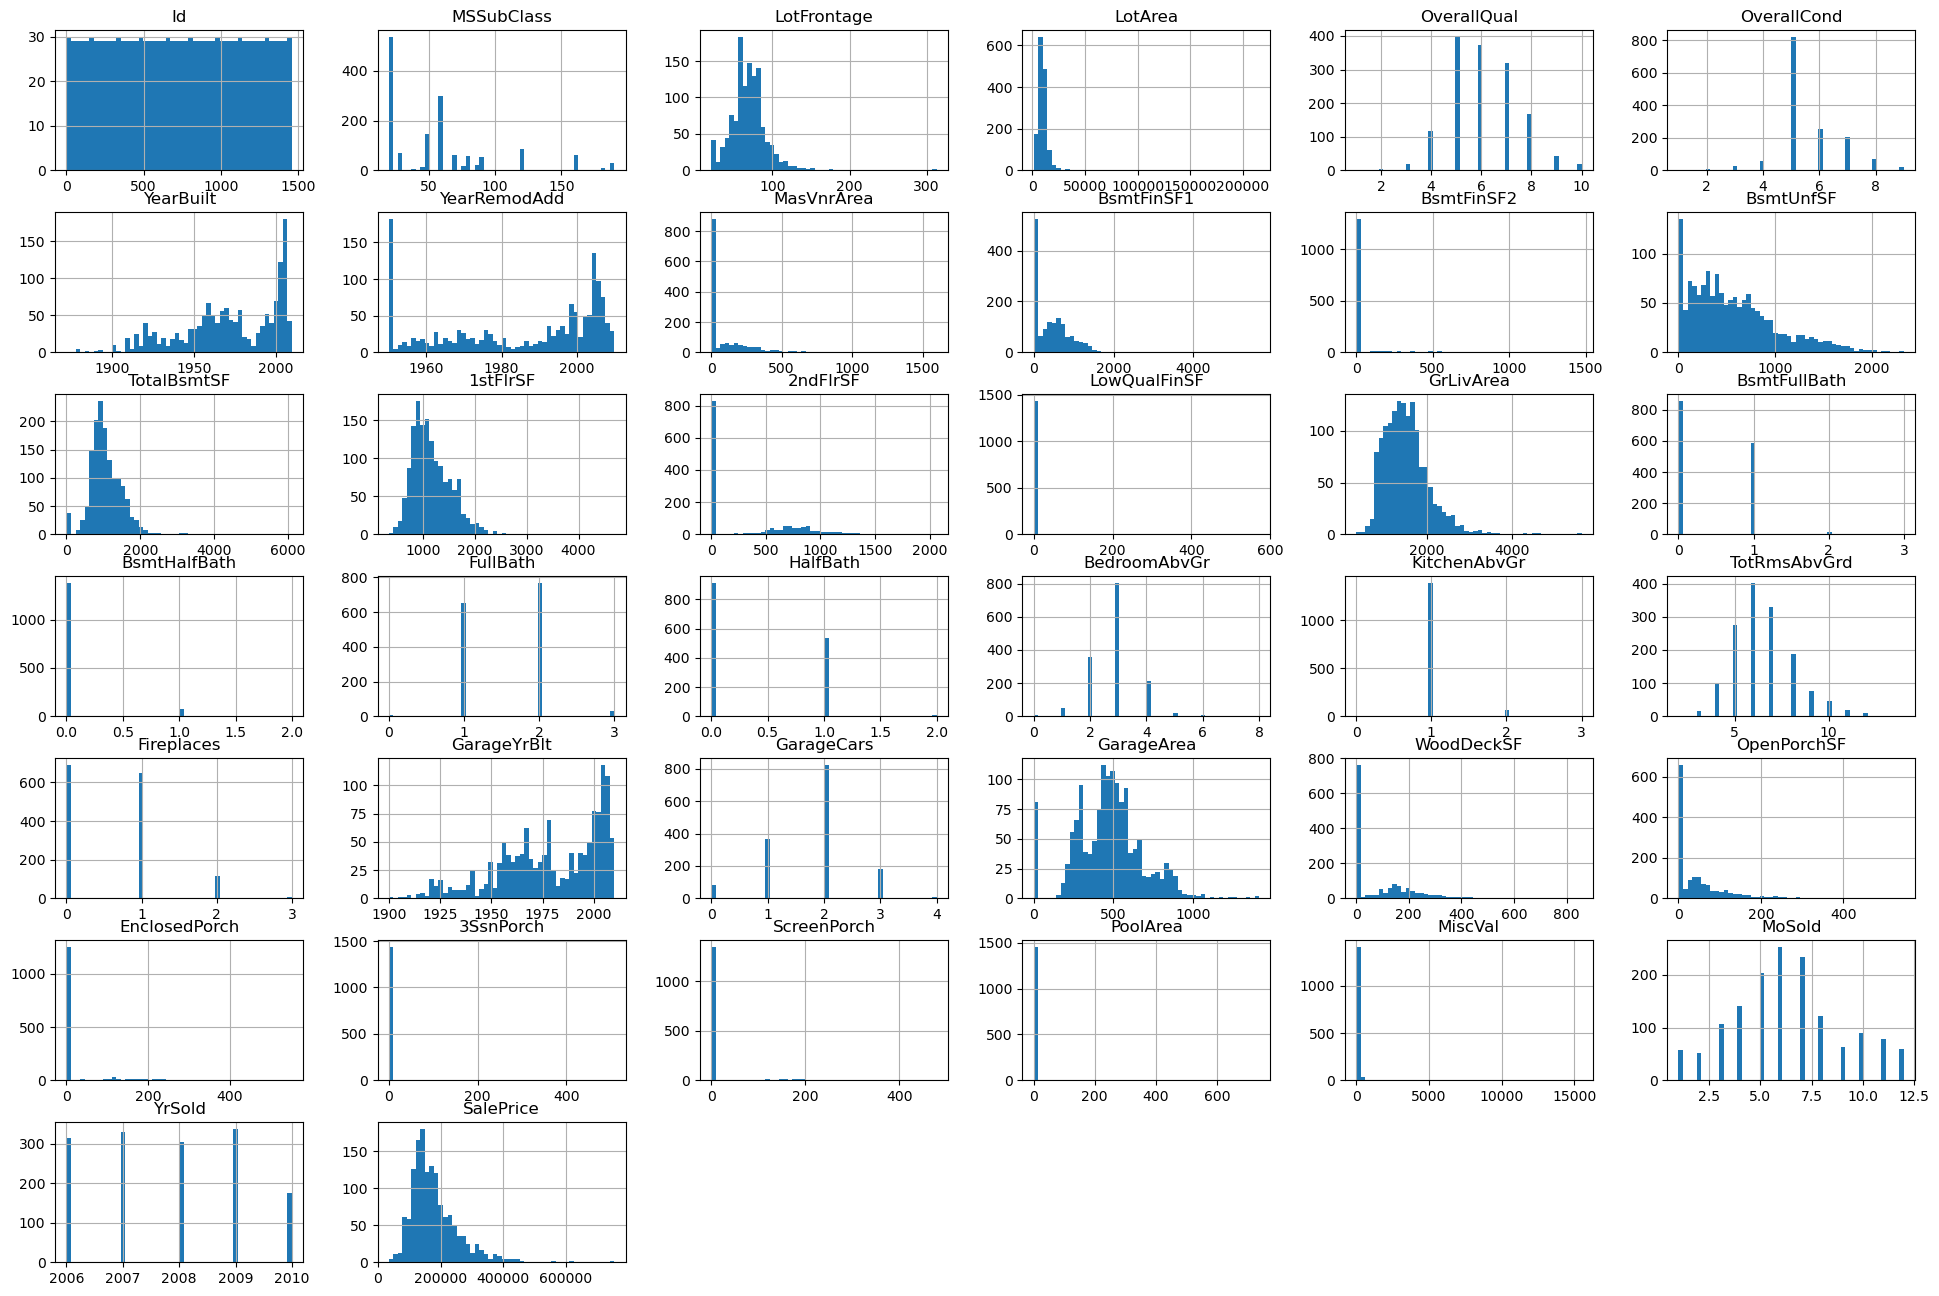

In [13]:
train.hist(bins = 50, figsize = (24,16))
plt.show()

### Rozkład zmiennej docelowej

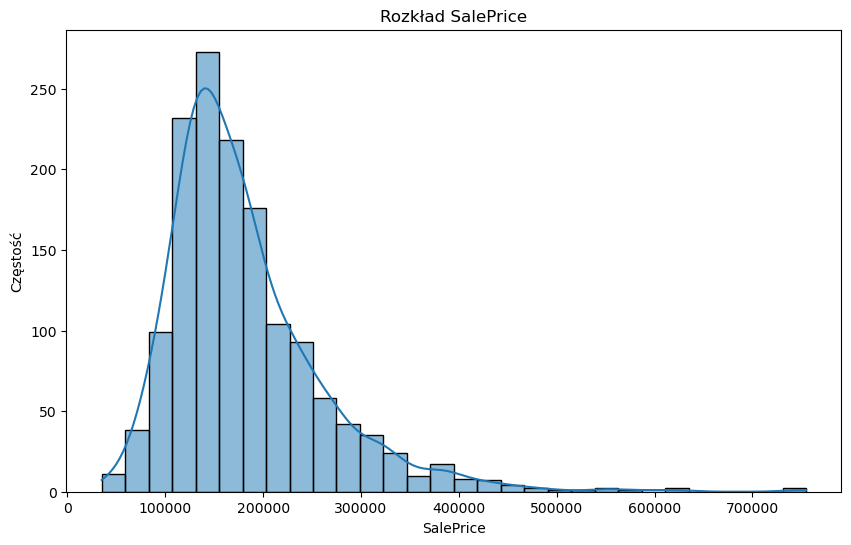

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'],kde = True, bins= 30)
plt.title('Rozkład SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Częstość')
plt.show()

Wnioski

- Rozkład jest prawostronnie asymetryczny (prawoskośny), co oznacza ze wieksza  cześć danych koncentruje sie w niższych wartosciach od 100 000 do 250 000
- Rozkład jest jednomodalny poniewaz posiada jeden wyraźny szczyt w okolicach wartości 150 000- 200 000, oznacza to ze większość cen domów w zbiorze danych mieści sie w tym przedziale

Asymetryczność ma negaywny wpływ na działanie niekótrych modeli regresji,takich jak regrsja liniowa które zakładaja normalność rozkładu zmiennej docelowej.

<Axes: xlabel='LogSalePrice', ylabel='Count'>

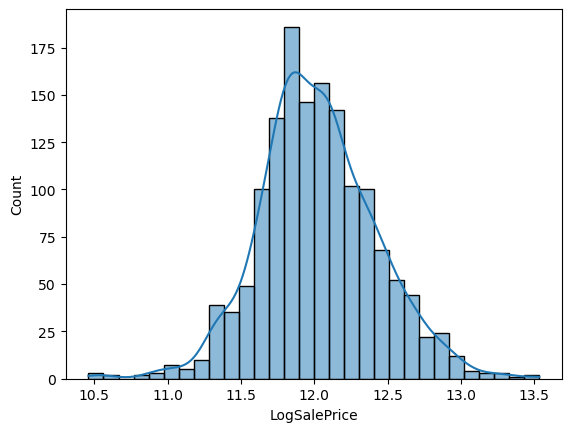

In [15]:
train['LogSalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['LogSalePrice'], kde=True, bins=30)

### Wnioski

- Rozład jest bardziej symetryczny i zbliżony do normalnego (rozkładu Gaussa), oznacza to ze dane po transformacji lepiej spełniaja założenia normalnosci co wpłynie korzystniej na algorytmy uczenia maszynowego, takich jak regresja liniowa.
- wysokie ceny, które wczesniej znajdowały sie na prawym koncu rozkładu i wpływaja na asymetrie zostały skompresowane w bardzie zwartej formie przez co ich wpływ na modelowanie jest teraz ograniczony
- dominujacym przedziałem jest 12 co odpowiada rzeczywistej wartosci ceny
- rozkład normalny jest zblizony do normalnego. zastosowanie tej transrmacji poprawi predykcje

Funkcja wykonuje logarytm naturalny (logarytm w podstawie e) dodoając 1 do wartości wejściowej przed wykonaniem logarytmu co pozwala uniknąc błedu logarytmowania wartości 0 (prowadzi do nieskonczoności )

### Relacja między YearBuilt (rok budowy) a SalePrice (cena sprzedaży)

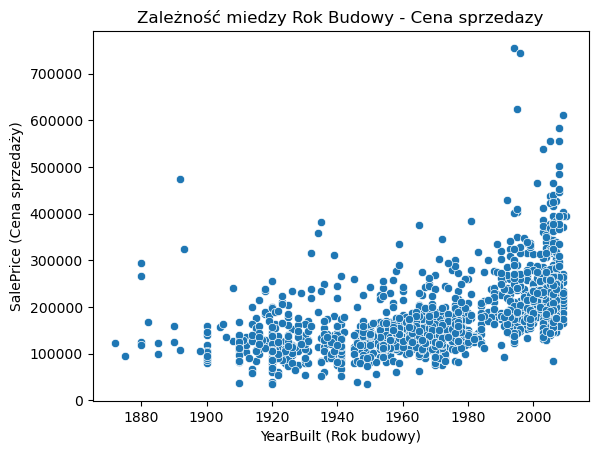

In [16]:
sns.scatterplot(x= train['YearBuilt'],y= train['SalePrice'])
plt.title('Zależność miedzy Rok Budowy - Cena sprzedazy')
plt.xlabel('YearBuilt (Rok budowy)')
plt.ylabel('SalePrice (Cena sprzedaży)')
plt.show()

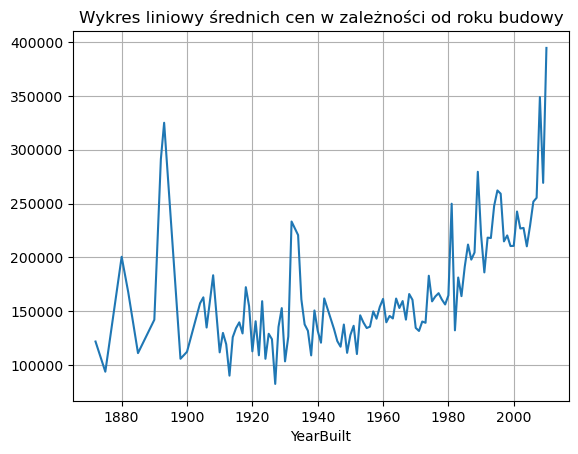

In [17]:
avg_price_by_year = train.groupby('YearBuilt')['SalePrice'].mean()
avg_price_by_year.plot(kind = 'line')
plt.title('Wykres liniowy średnich cen w zależności od roku budowy')
plt.grid()
plt.show()

### Wnioski
- Ceny domow maja ogolną tendencje wzrostową 
- Ceny domów w okolicach roku 2000 rosna co jest logiczne poniewaz nowsze budynki zwykle mają lepsze standardy 
- Najwiecej domów zostało zbudowanych miedzy 1950 - 2000 co zoznacza ze był to okres intensywnego rozwoju budowlanego
- Istnieje kilka wyjątków:
    - kilka domów zdudowanych miedzy 1880-1900 które przekraczaja cene 300 000 co oznacza ze domy te maja jakas wartosc historyczna
    - kilka domow zbudowanych po 2000 jest bardzo drogich (powyżej 700 000) co oznacza ze to luksusowe rezydencje 

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

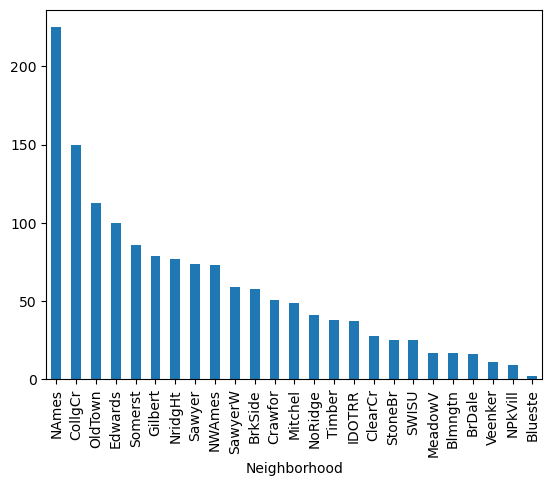

In [18]:
train['Neighborhood'].value_counts().plot(kind= 'bar')
plt.title 

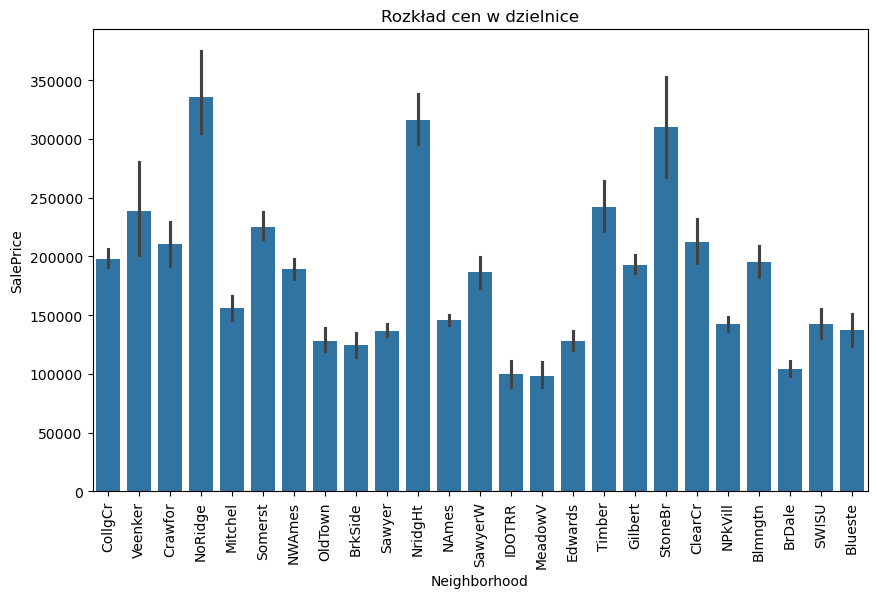

In [19]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['Neighborhood'],y=train['SalePrice'])
plt.title('Rozkład cen w dzielnice')
plt.xticks(rotation=90)
plt.show()

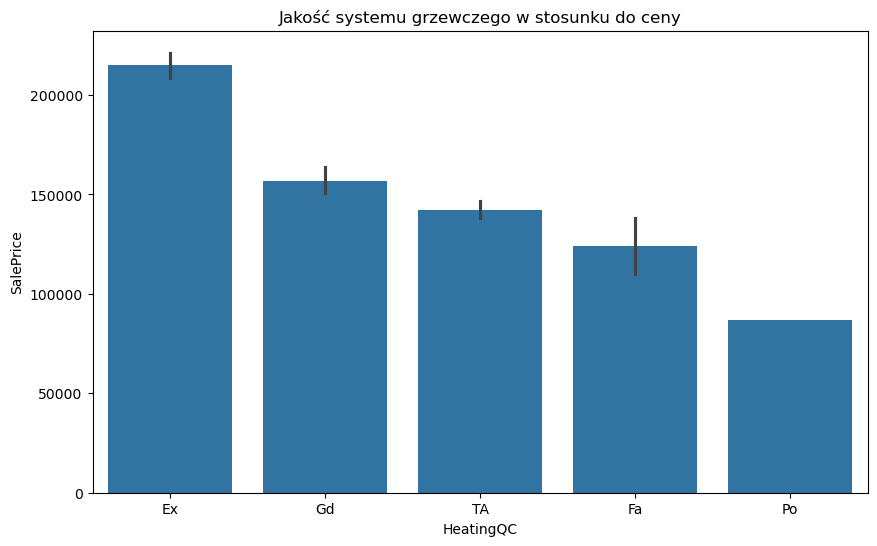

In [20]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['HeatingQC'],y=train['SalePrice'])
plt.title('Jakość systemu grzewczego w stosunku do ceny')
plt.show()


## Wykres braków

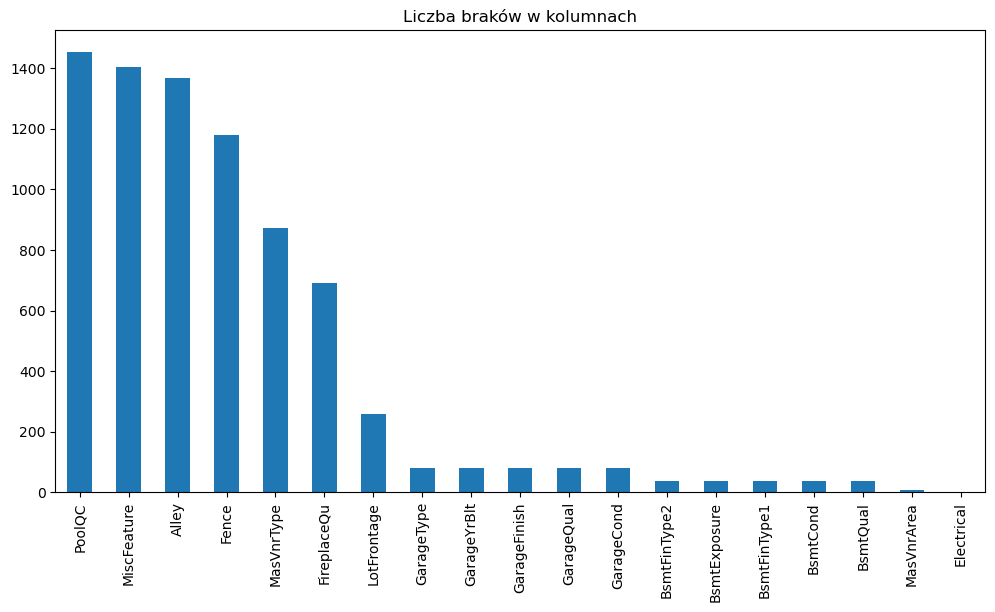

In [21]:
missing_values.plot(kind= 'bar',figsize= (12,6))
plt.title('Liczba braków w kolumnach')
plt.show()

## Wnioski 
Kolumny po lewej stronie wykresu mają najwiecej braków a im dalej w prawo, tym liczba braków maleje. 

Niektóre kolumny maja bardzo dużą liczbe braków, rozważe ich usuniecie.

## Przygotowywanie danych

Dane zmiennych kategorycznych wypełnie za pomoca  One-Hot Encoding poniewaz:
- jest to odpowieni sposób dla zmiennych które nie mają naturalnego porzadku
- dzieki temu sposobowi kodowania zmiennych model nie zakłada fałszywej hierarchii miedzy wartościami w przeciwieństwie do Label Encoding gdzie liczby mogą sugerowac porzadek 
- One-Hot Encoding zwraca macierz rzadką


#### Kolumna PoolQC
odnosi sie do jakosci basenu w domach, jest tylko 7 watosci poniewaz w 7 domach sa tylko baseny. Oznacza to ze posiadanie basenów jest bardzo rzadkie i moze byc cechą charakterystyczna dla luksusowych nieruchomości. Warto bedzie przeprowadzic analize jak posiadanie basenu wpływa na cene

Zamierzam wypełnic puste wartosci a nastepnie zakodowac jako zmienna numeryczna aby uwzglednic ja w  modelu.
- Gd good
- Ex Excellent
- Fa fair

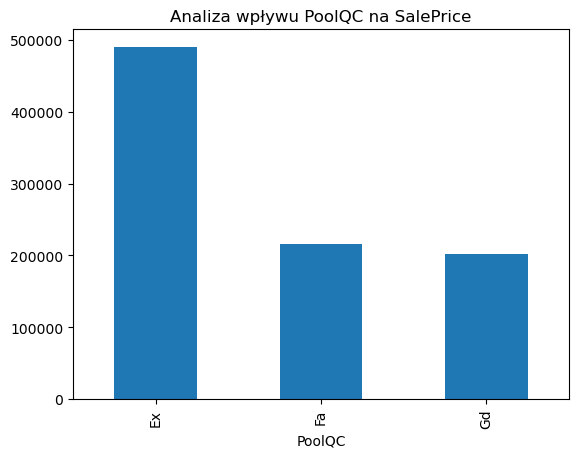

In [22]:
train.groupby('PoolQC')['SalePrice'].mean().plot(kind= 'bar')
plt.title('Analiza wpływu PoolQC na SalePrice')
plt.show()

In [23]:
train['PoolQC']= train['PoolQC'].fillna('None')

In [24]:
train['PoolQC'].value_counts()

PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64

#### kolumna MiscFeature
Zawiera informacje o dodatkowych cechach nieruchomości kóre nie sa opisane w innych kolumnach, 

Zamierzam wypełnic braki i zakodowac kolumne na wartosci numeryczne

- Shed schowek,szopa
- Gar2 garage 2
- othr other
- TenC Tennis Court


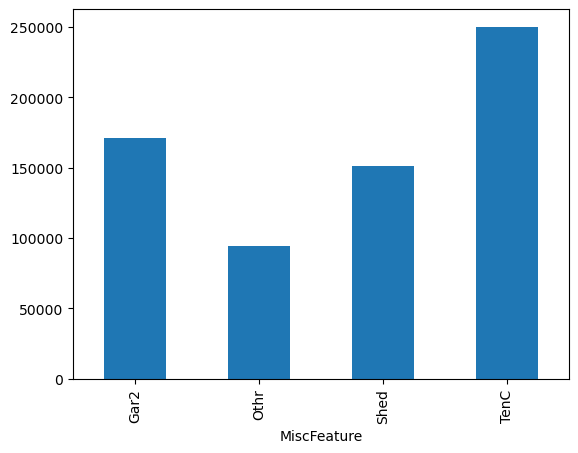

In [25]:
train.groupby('MiscFeature')['SalePrice'].mean().plot(kind= 'bar');

In [26]:
train['MiscFeature']= train['MiscFeature'].fillna('None')

In [27]:
train['MiscFeature'].value_counts()

MiscFeature
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [28]:
# Kolumna LotFrontage (Długość frontu działki) wypełnie puste miejsca srednia 
train['LotFrontage']= train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [29]:
# Kolumna Określa rodzaj wykończenia elewacji budynku przy użyciu kamienia lub cegły.
train['MasVnrType']= train['MasVnrType'].fillna('None')
train['MasVnrType'].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [30]:
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'].isna())][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


In [31]:
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'] != 0)][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
624,None,288.0
650,None,NaN
773,None,1.0
936,None,NaN
973,None,NaN
977,None,NaN
1230,None,1.0
1243,None,NaN


W kolumnach 'MasVnrArea' i 'MasVnrType' jest niescisłosc poniewaz w kolumnie nie wpisano typu a powierzchnia jest wpisana

In [32]:
train['MasVnrArea']= train['MasVnrArea'].fillna(0)

In [33]:
train['MasVnrArea'].isnull().sum()

0

### Kolumny związane z piwnicą
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

Kolumne BsmtQual wypełnie wartościa none a reszte usune poniewaz nie uwazam aby miały jakis wplyw na cene

In [34]:
# Kolumna BsmtQual
train['BsmtQual'].isnull().sum()

37

In [35]:
train['BsmtQual']= train['BsmtQual'].fillna('None')

In [36]:
train['BsmtQual'].value_counts()

BsmtQual
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: count, dtype: int64

In [37]:
# kolumna Electrical
train['Electrical'].isnull().sum()

1

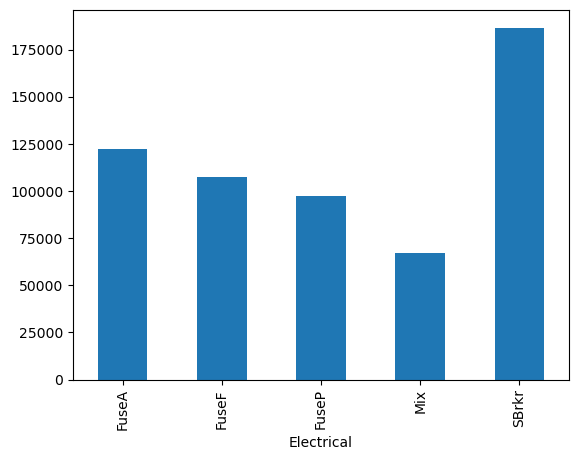

In [38]:
train.groupby('Electrical')['SalePrice'].mean().plot(kind= 'bar');

In [39]:
train['Electrical']= train['Electrical'].fillna('mode')

### Kolumna FireplaceQu (Jakość kominka)

Do ocena jakosci kominka uzyto wartosci które bedze mozna 
- Ex: Doskonała.
- Gd: Dobra.
- TA: Średnia.
- Fa: Niska.
- Po: Bardzo niska.
- None: Brak kominka.

In [40]:
train['FireplaceQu']= train['FireplaceQu'].fillna('None')

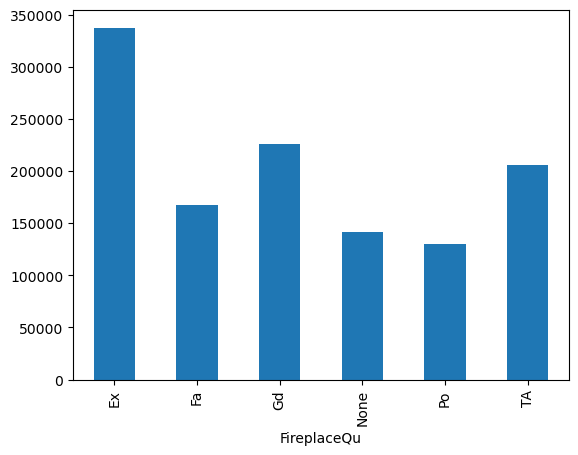

In [41]:
train.groupby('FireplaceQu')['SalePrice'].mean().plot(kind= 'bar');

In [42]:
fireplace_quality_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['FireplaceQu']= train['FireplaceQu'].map(fireplace_quality_mapping)

In [43]:
train['FireplaceQu'].value_counts()

FireplaceQu
0    690
4    380
3    313
2     33
5     24
1     20
Name: count, dtype: int64

### Kolumny związane z garażem



In [44]:
train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [45]:
# wypełnienie pustych wartości 
for col in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    train[col]= train[col].fillna('None')

#### Kolumna GarageQual

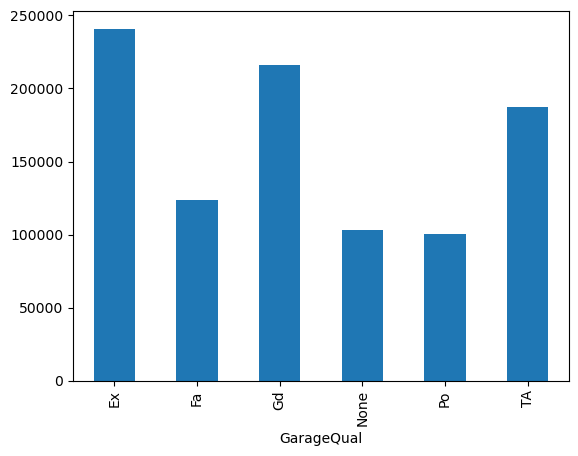

In [46]:
train.groupby('GarageQual')['SalePrice'].mean().plot(kind= 'bar');

In [47]:
garage_quality_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['GarageQual']= train['GarageQual'].map(fireplace_quality_mapping)

#### Kolumna GarageFinish

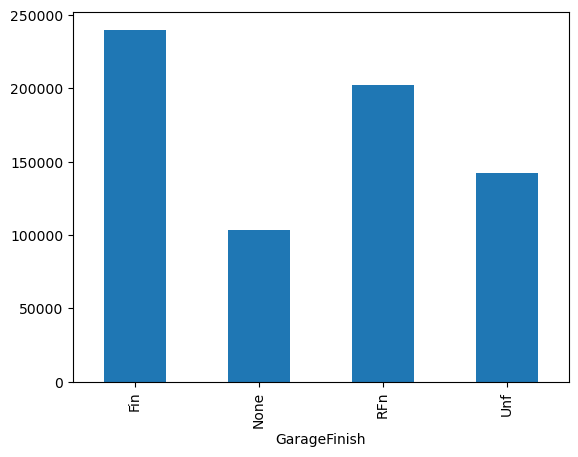

In [48]:
train.groupby('GarageFinish')['SalePrice'].mean().plot(kind= 'bar');

In [49]:
train['GarageFinish'].value_counts()

GarageFinish
Unf     605
RFn     422
Fin     352
None     81
Name: count, dtype: int64

In [50]:
garage_finish_mapping= {'Fin':3,'RFn':2,'Unf':1,'None':0}

train['GarageFinish']= train['GarageFinish'].map(garage_finish_mapping)

#### Kolumna GarageCond

In [51]:
garage_cond_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['GarageCond']= train['GarageCond'].map(garage_cond_mapping)

#### Kolumna Fence

- GdPrv: Dobre prywatne.
- MnPrv: Średnie prywatne.
- GdWo: Dobre, ale bez prywatności.
- MnWw: Średnie, bez prywatności.
- None: Brak ogrodzenia.

In [52]:
train['Fence']= train['Fence'].fillna('None')

In [53]:
train['Fence'].value_counts()

Fence
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

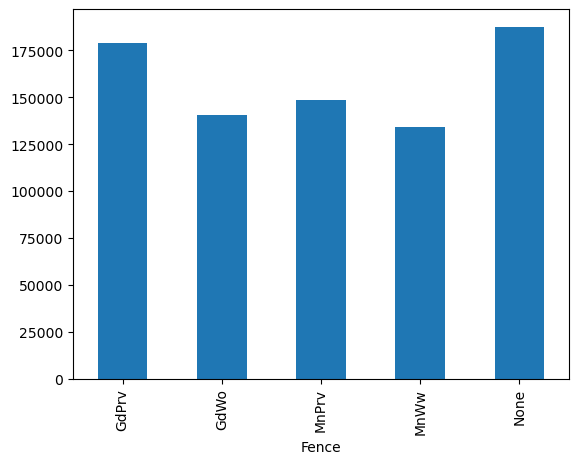

In [54]:
train.groupby('Fence')['SalePrice'].mean().plot(kind= 'bar');

In [55]:
fence_mapping = {GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}

train['Fence']= train['Fence'].map(fence_mapping)

SyntaxError: unterminated string literal (detected at line 1) (4031189552.py, line 1)

In [72]:
train.isnull().sum()[train.isnull().sum() >=1]

Alley           1369
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [33]:
train[list_object]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,NaN,0,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,0,NaN,0,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,NaN,0,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,0,NaN,0,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,0,NaN,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,0,NaN,0,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,0,GdPrv,1,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,NaN,0,WD,Normal


In [30]:
X = train.drop(['LogSalePrice','SalePrice','Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'], axis =1)
y = train['LogSalePrice']

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Walidacja danych: Podział na zestawy treningowe i walidacyjne

Zmienna docelowa po zlogarytmowanu przypomina rozkład normalny dlatego moim wyborem jest walidacja danych za pomocą Kfold która dobrze sprawdza sie w problemach regresji

In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

for train_index, val_index in kf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    

SyntaxError: expected ':' (1735023254.py, line 5)